In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx=pd.read_csv('Diabetes_XTrain.csv')
x=dfx.values
dfy=pd.read_csv('Diabetes_YTrain.csv')
y=dfy.values
print(x.shape,y.shape)

(576, 8) (576, 1)


In [15]:
split=int(0.9*x.shape[0])
x_train=x[:split,:]
y_train=y[:split]
x_test=x[split:,:]
y_test=y[split:]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(518, 8) (518, 1) (58, 8) (58, 1)


In [8]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [9]:
def KNN(x,y,query,k=5):
    values=[]
    for i in range(x.shape[0]):
        d=distance(x[i],query)
        values.append((d,y[i]))
    values=sorted(values)
    values=values[:k]
    values=np.array(values)
    data=np.unique(values,return_counts=True)
    index=data[1].argmax()
    return data[0][index]

In [16]:
#pred=KNN(x_train,y_train,x_test[100])
#print(pred,y_test[100])
Y=[]
for i in range(x_test.shape[0]):
    pred=KNN(x_train,y_train,x_test[i])
    Y.append(pred)
print(((y_test==Y).sum())/y_test.shape[0])

0.7068965517241379


<BarContainer object of 2 artists>

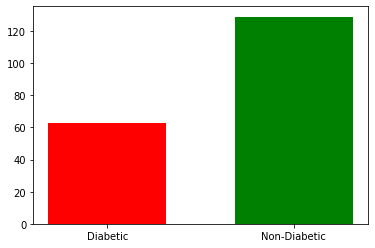

In [17]:
df_test=pd.read_csv('Diabetes_XTest.csv')
X=df_test.values
Y_pred=[]
for i in range(X.shape[0]):
    Y_pred.append(KNN(x,y,X[i]))
tick_label=['Diabetic','Non-Diabetic']
left=[2,5]
data1,data2=np.unique(Y_pred,return_counts=True)
final=dict(zip(data1,data2))
height=[final[1],final[0]]
plt.bar(left,height,tick_label=tick_label,width=1.9,color=['red','green'])

In [19]:
Y_final=[]
Y_pred=np.array(Y_pred)
for i in range(Y_pred.shape[0]):
    if(Y_pred[i]==0):
        Y_final.append('Non-Diabetic')
    else:
        Y_final.append('Diabetic')
df_test_y=pd.DataFrame(Y_final,columns=['Outcome'])
df_test.join(df_test_y)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,180,90,26,90,36.5,0.314,35,Diabetic
1,2,93,64,32,160,38.0,0.674,23,Non-Diabetic
2,2,114,68,22,0,28.7,0.092,25,Non-Diabetic
3,13,76,60,0,0,32.8,0.180,41,Non-Diabetic
4,1,80,74,11,60,30.0,0.527,22,Non-Diabetic
...,...,...,...,...,...,...,...,...,...
187,10,108,66,0,0,32.4,0.272,42,Diabetic
188,3,130,64,0,0,23.1,0.314,22,Non-Diabetic
189,0,162,76,36,0,49.6,0.364,26,Diabetic
190,12,84,72,31,0,29.7,0.297,46,Diabetic
